In [49]:
# Third party imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance

# Standard library imports
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, precision_recall_curve

import importlib

import feature_engineering_transformers
importlib.reload(feature_engineering_transformers)

# import pipeline_transformers
# importlib.reload(pipeline_transformers)

# import tensorflow_model
# importlib.reload(tensorflow_model)


from feature_engineering_transformers import BiographyTransformer, PCATransformer, MissingValueIdentifier, RatioTransformer

import pytorch_model
importlib.reload(pytorch_model)
from pytorch_model import Net

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam

import numpy as np


[nltk_data] Downloading package punkt to /home/ilyas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ilyas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory Data Analysis 

In [2]:
df = pd.read_csv("data/tiktok.csv")
df.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


In [26]:
df.dtypes

timestamp                   object
account_id                  object
nickname                    object
biography                   object
awg_engagement_rate        float64
comment_engagement_rate    float64
like_engagement_rate       float64
bio_link                    object
is_verified                   bool
followers                    int64
following                    int64
likes                        int64
videos_count                 int64
create_time                float64
id                           int64
top_videos                  object
url                         object
profile_pic_url             object
dtype: object

In [27]:
df.describe()

,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,followers,following,likes,videos_count,create_time,id
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,0.0,1.000000e+03
mean,0.562932,0.026569,0.536364,1.130869e+05,1136.810000,3.371786e+06,271.942000,NaN,6.261038e+18
std,3.222055,0.140016,3.159788,6.698270e+05,2072.258891,3.128021e+07,464.261197,NaN,1.870752e+18
min,0.000091,0.000000,0.000000,1.000000e+00,0.000000,3.000000e+00,1.000000,NaN,1.610000e+05
25%,0.012528,0.000252,0.011791,6.712500e+02,75.750000,1.930000e+03,18.000000,NaN,6.656165e+18
50%,0.053558,0.001203,0.049653,5.241000e+03,295.000000,3.895000e+04,88.000000,NaN,6.804025e+18
75%,0.202409,0.006157,0.189987,3.160000e+04,1065.750000,4.986000e+05,318.000000,NaN,6.936877e+18
max,63.375000,2.000000,63.000000,1.450000e+07,10000.000000,8.635000e+08,5394.000000,NaN,7.253326e+18


**Learning:** The engagement-rate-columns have unsual outliers with extermly high values. Let's check them out:

In [30]:
df.query("awg_engagement_rate > 5")

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
17,2023-08-01,a3536363773,~🦋~,👑,6.250000,0.027778,6.222222,NaN,False,144,151,8064,10,NaN,7082117250660320257,https://www.tiktok.com/@a3536363773/video/7108...,https://www.tiktok.com/@a3536363773,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
32,2023-08-11,grayson__o,Grayson,Yeet,6.713306,0.193079,6.520227,NaN,False,27400,1646,2500000,15,NaN,6703525820192916486,https://www.tiktok.com/@grayson__o/video/69562...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
203,2023-07-27,soyulsu,⊂((・▽・))⊃,#шок,36.498039,0.898039,35.600000,NaN,False,15,20,9318,17,NaN,7092717888414434310,https://www.tiktok.com/@soyulsu/video/71032152...,https://www.tiktok.com/@soyulsu,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
222,2023-07-26,xlunvie,Lunvieee,Cringey Girl on League,11.771167,0.068387,11.702781,NaN,False,3992,1047,197500,4,NaN,6795624748552717317,https://www.tiktok.com/@xlunvie/video/70643123...,https://www.tiktok.com/@xlunvie,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
236,2023-08-04,kmr994,Kailaaa,Mom to a 🥔,40.697484,0.261581,40.435903,NaN,False,626,20,202500,8,NaN,6763008420943430662,https://www.tiktok.com/@kmr994/video/712264678...,https://www.tiktok.com/@kmr994,https://p19-sign.tiktokcdn-us.com/tos-useast5-...
242,2023-08-04,obx2xo,obx2xo,outer banks ❤️\njj and john b ✰,63.375000,0.375000,63.000000,NaN,False,4,6,504,2,NaN,6993070140044936198,https://www.tiktok.com/@obx2xo/video/699422652...,https://www.tiktok.com/@obx2xo,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
442,2023-07-25,opg.ng,OPG.NG,Opg_ng,7.229167,1.854167,5.375000,NaN,False,24,17,258,2,NaN,6923461241567085570,https://www.tiktok.com/@opg.ng/video/695423469...,https://www.tiktok.com/@opg.ng,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
449,2023-08-03,k0ocyk.sar.a,TU KOCYK SARA✨😎,wyczuwam sławę 😎😎\nKONTO POD NADZOREM RODZICA\...,5.714286,0.214286,5.500000,NaN,False,28,17,154,1,NaN,6943327070634624006,https://www.tiktok.com/@k0ocyk.sar.a/video/694...,https://www.tiktok.com/@k0ocyk.sar.a,https://p77-sign-va.tiktokcdn.com/tos-maliva-a...
529,2023-07-26,diy_girls01,DIY❤️,Can this go viral?? ❥\nฅ^•ﻌ•^ฅ \n3 girlsss\n♥...,13.166667,0.333333,12.833333,NaN,False,6,2,77,1,NaN,6883088170109518849,https://www.tiktok.com/@diy_girls01/video/6883...,https://www.tiktok.com/@diy_girls01,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
585,2023-08-04,d00l_b4by,ルイザ,pronomes ela/dela!\nvirgem/corvinal\ninfp!,6.146341,0.597561,5.548780,NaN,False,82,102,2083,1,NaN,6937039279114503174,https://www.tiktok.com/@d00l_b4by/video/693773...,https://www.tiktok.com/@d00l_b4by,https://p77-sign-va.tiktokcdn.com/tos-maliva-a...


In [60]:
df.isnull().sum()

timestamp                     0
account_id                    0
nickname                      0
biography                     3
awg_engagement_rate           0
comment_engagement_rate       0
like_engagement_rate          0
bio_link                    809
is_verified                   0
followers                     0
following                     0
likes                         0
videos_count                  0
create_time                1000
id                            0
top_videos                    0
url                           0
profile_pic_url               0
dtype: int64

**Learning:** There is not a single value for "create_time" which makes "timestamp" not really valueable -> drop both columns. 

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


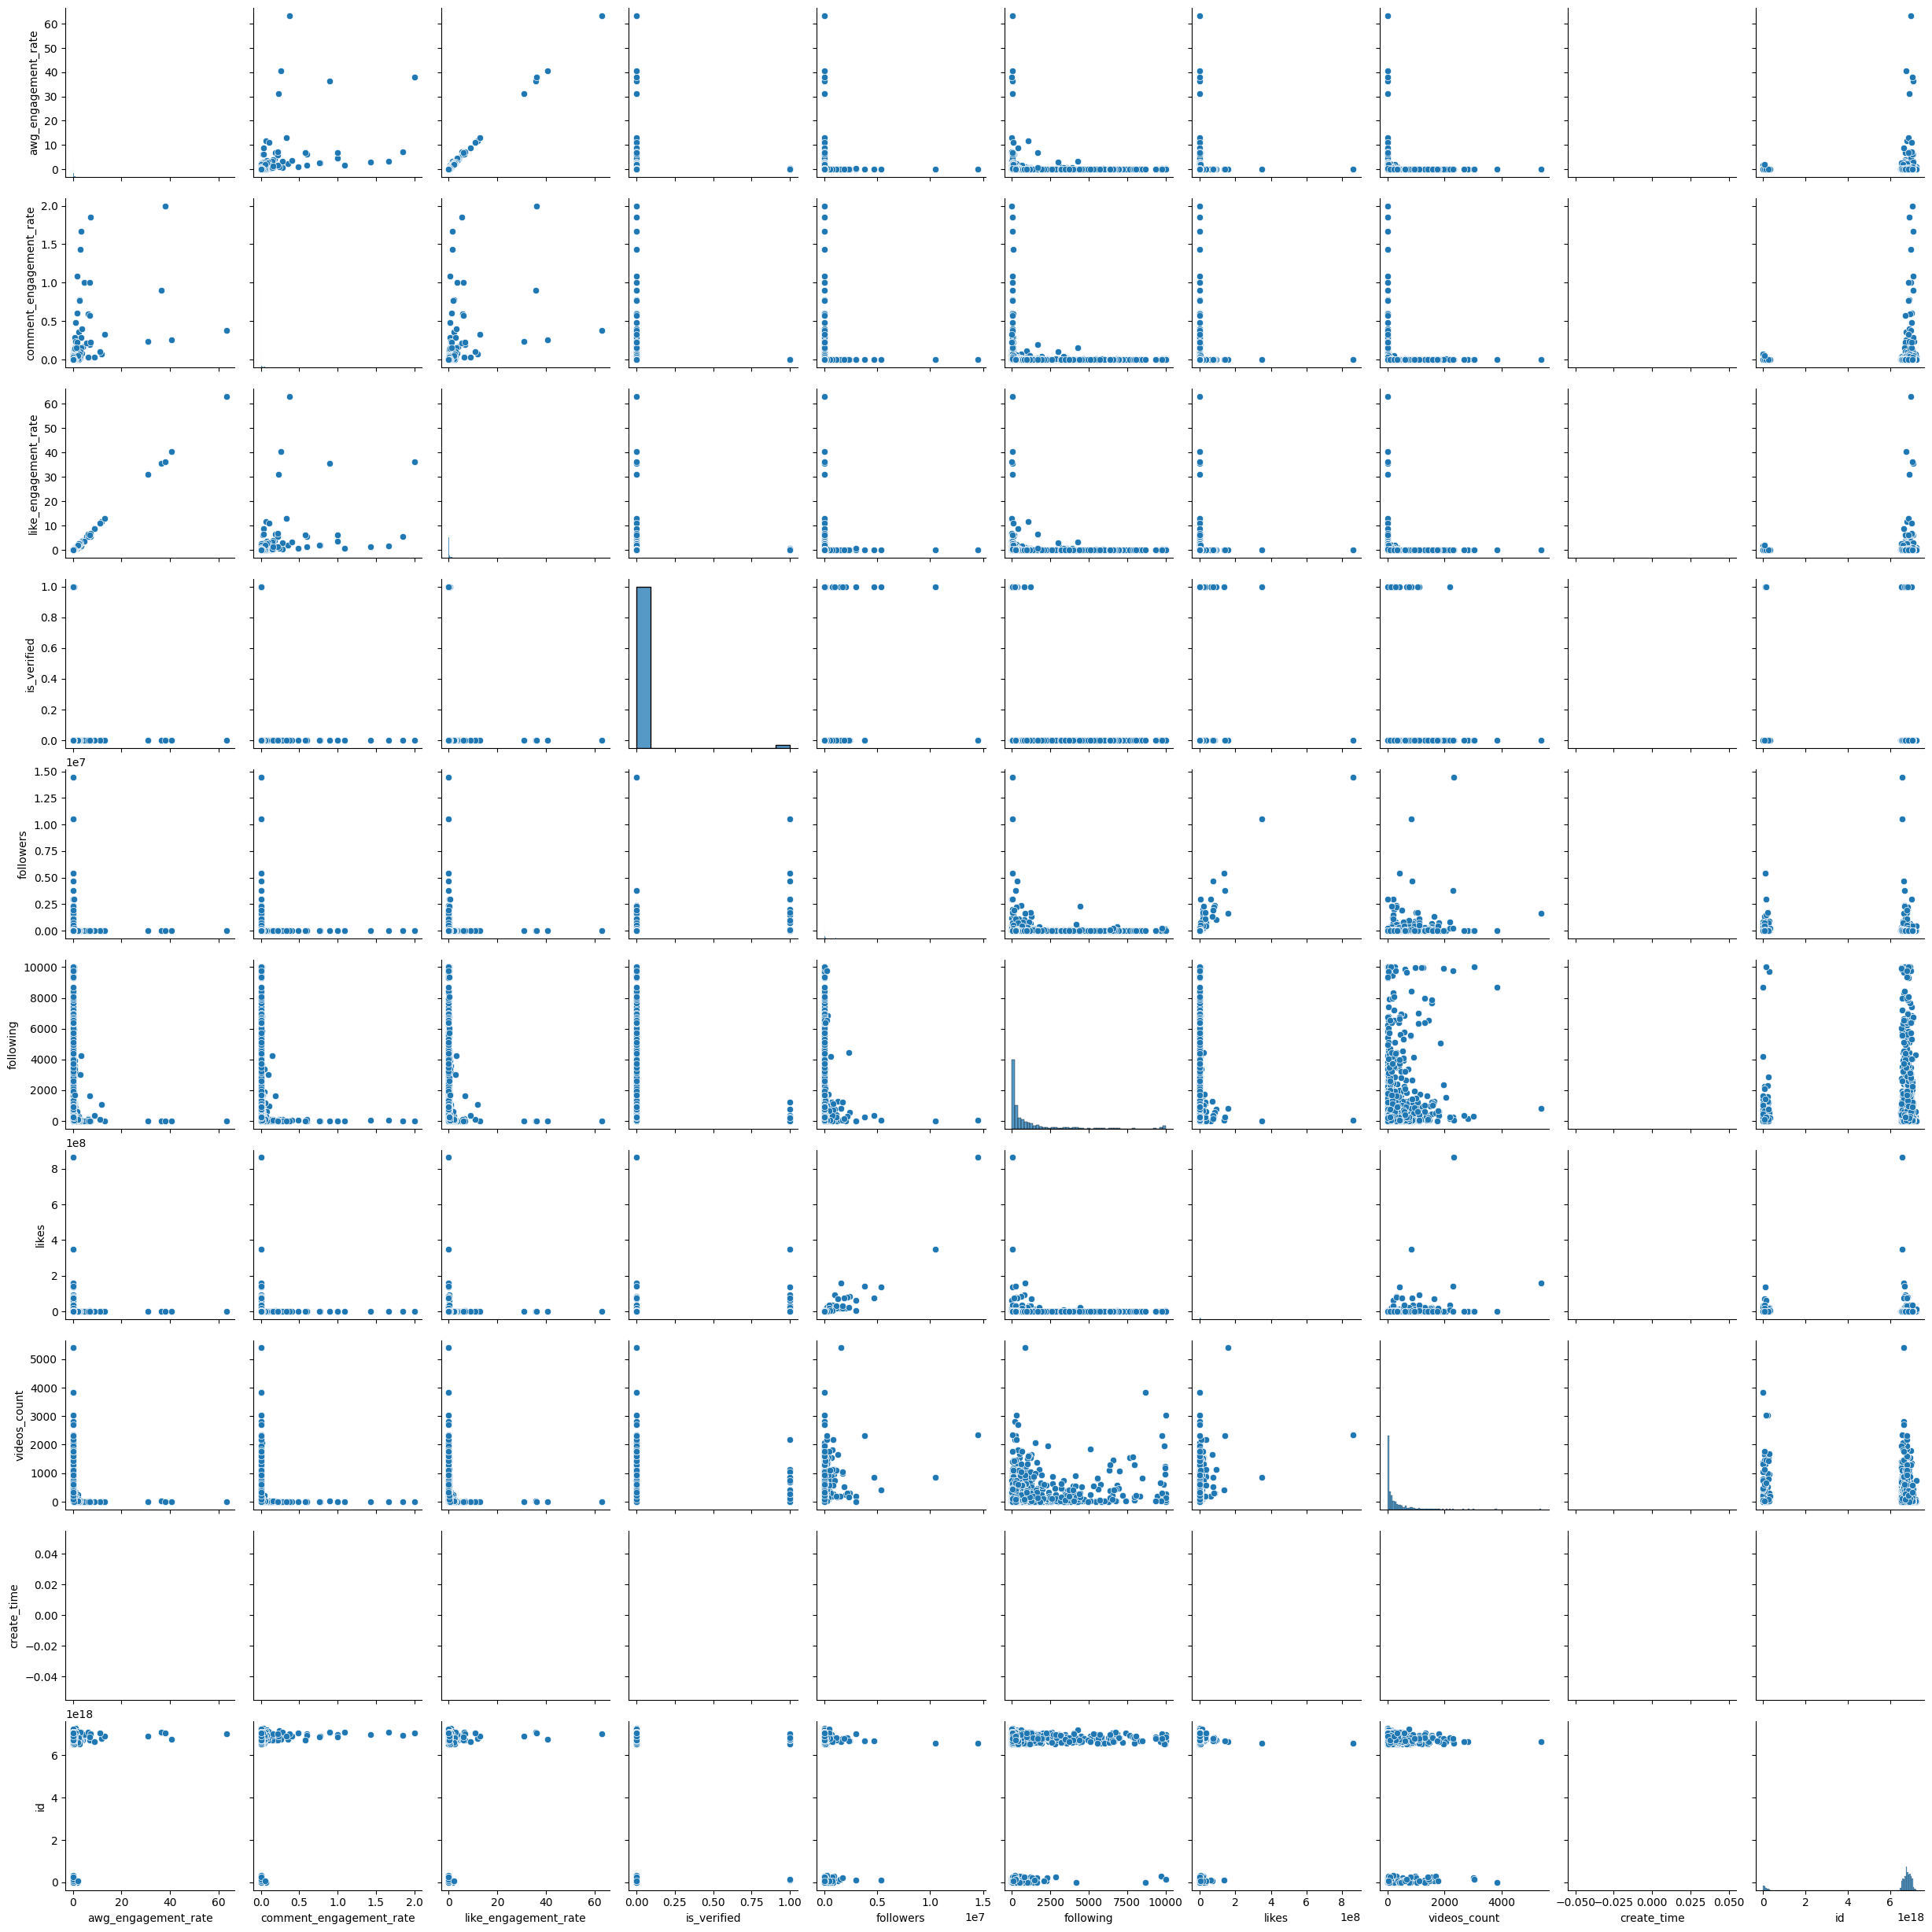

In [31]:
sns.pairplot(df)

Let's check the **mutual information (MI) score** to get a feeling for the most important features:

<Axes: xlabel='MI Scores', ylabel='Features'>

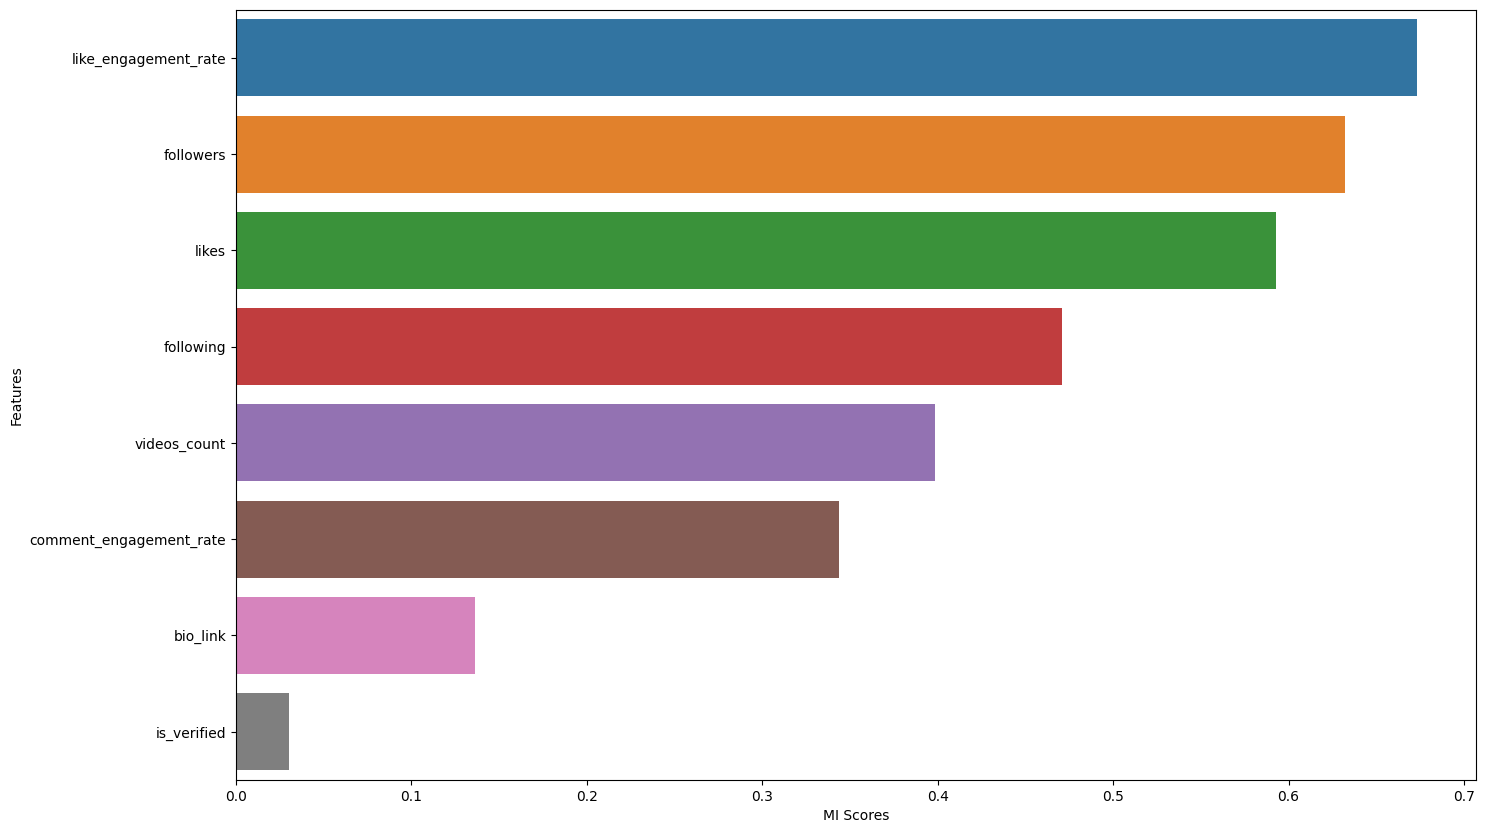

In [55]:
# Drop some columns for now (we're gonna handle them later on)
X_mi = df.drop(columns=["id", "timestamp", "top_videos", "url", "profile_pic_url", "create_time", "account_id", "nickname", "biography"])
y_mi = X_mi.pop("awg_engagement_rate") > 0.05

# Factorize object type columns
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()

# Identify discrete features
discrete_features = X_mi.dtypes == int

# Function to calculate mutual information scores
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Calculate mutual information scores
mi_scores = make_mi_scores(X_mi, y_mi, discrete_features)

# Plot the scores
plt.figure(figsize=(16,10))
plt.ylabel("Features")
sns.barplot(x=mi_scores, y=mi_scores.index)

**Learning:** As expected, features like the number of followers or the like_engagement_rate play a significant role in determining whether or not a user is a content creator.

Next, Let's check the **permutation importance (PI)** of the features with a quick a dirty model: 

In [59]:
# Drop some columns for now (we're gonna handle them later on)
X_pi = df.drop(columns=["id", "timestamp", "top_videos", "url", "profile_pic_url", "create_time", "account_id", "nickname", "biography", "bio_link"])
y_pi = X_pi.pop("awg_engagement_rate") > 0.05 

# Factorize object type columns
for colname in X_pi.select_dtypes("object"):
    X_pi[colname], _ = X_pi[colname].factorize()

X_train, X_val, y_train, y_val = train_test_split(X_pi, y_pi, random_state=1)
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

# Define a scorer for Mean Absolute Error
f1_scorer = make_scorer(f1_score)

# Calculate the scores
perm = PermutationImportance(my_model, scoring=f1_scorer, random_state=1).fit(X_val, y_val)

# Display the weights of permutation importance
eli5.show_weights(perm, feature_names = X_val.columns.tolist(), top=None)

Weight,Feature
0.4404 ± 0.0799,like_engagement_rate
0.0037 ± 0.0047,comment_engagement_rate
0.0029 ± 0.0029,followers
0.0007 ± 0.0029,likes
0 ± 0.0000,videos_count
0 ± 0.0000,following
0 ± 0.0000,is_verified


**Learning:** As expected, the PI-scores validate the previous findings

Let's have a closer look at the corelation between the likes and the followers:  

<Axes: xlabel='likes', ylabel='followers'>

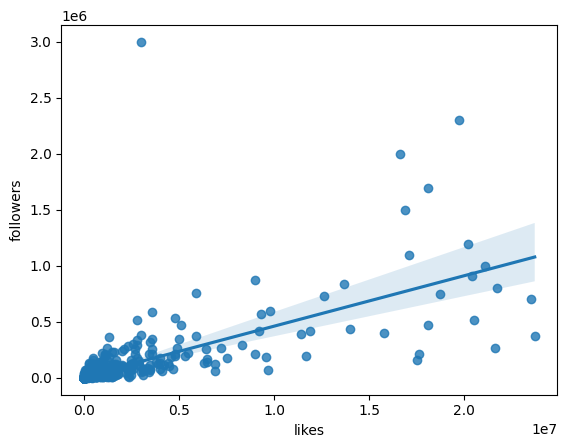

In [130]:
small_df = df.query("likes < 29000000") # Remove some extrem outliers
sns.regplot(x=small_df["likes"], y=small_df["followers"])

**Learning:** Given that both "likes" and "followers" are significant features, as observed earlier, employing **Principal Component Analysis (PCA)** for **feature engineering** would be beneficial. This approach would "inform" the model about the axes that exhibit the maximum variance.

Let's check out the rows tha include a link in the bio: 

In [3]:
df[~df["bio_link"].isna()]

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
5,2023-08-11,preyah_,Preyah,Singer 🎤 Songwriter 📝\nГледай 💎ДИАМАНТ💎 сега 👇🏽,0.008076,0.000048,0.008028,https://youtu.be/jUTqaSMbBoQ,False,108200,385,2000000,462,NaN,6740962431194055686,https://www.tiktok.com/@preyah_/video/72655902...,https://www.tiktok.com/@undefined,https://p16-sign-useast2a.tiktokcdn.com/tos-us...
9,2023-07-30,_k_1_ji_ji_e_ip__,_k_1_ji_ji_e_ip__,NaN,0.476190,0.047619,0.428571,https://t.me/wotblitzfreebot?start=2024639240,False,14,116,18,3,NaN,6986183228009907206,https://www.tiktok.com/@_k_1_ji_ji_e_ip__/vide...,https://www.tiktok.com/@_k_1_ji_ji_e_ip__,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
12,2023-08-11,laurenwolfe,Lauren Wolfe,Hi besties\nnyc\n💕,0.080566,0.000160,0.080406,https://linktr.ee/_laurenwolfe_,True,1000000,786,92300000,1117,NaN,6718235424344687621,https://www.tiktok.com/@laurenwolfe/video/7265...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
14,2023-08-11,itshoneydone,@itshoneydone | Kayla,Let me help you turn your honey-do list into h...,0.054740,0.000299,0.054440,https://linktr.ee/itshoneydone,False,288400,120,2300000,334,NaN,6814240381166158854,https://www.tiktok.com/@itshoneydone/video/726...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
28,2023-08-11,dream_boy__777,Manish Roy 👑,Dance+2 Live show in mumbai😘Love You Dance+ \n...,0.049902,0.001094,0.048808,https://youtu.be/w4dYY6KxnwQ,False,6767,1077,58400,296,NaN,6701918176119227398,https://www.tiktok.com/@dream_boy__777/video/6...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,2023-08-12,jordanannpetersen,JordanAnnPetersen,I am a wife and soon to be mommy of 3.,0.002843,0.000058,0.002785,https://www.youravon.com/jordanpetersen,False,2038,1916,7401,932,NaN,6801167060523222022,https://www.tiktok.com/@jordanannpetersen/vide...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
987,2023-08-11,rosebudbulldogs,Rosebud Bulldogs,Click the link - Our Website,0.072239,0.000806,0.071433,https://linktr.ee/rosebudbullldogs,False,101700,297,2200000,175,NaN,6767837071766094853,https://www.tiktok.com/@rosebudbulldogs/video/...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
994,2023-07-30,6_.hmr,مَيممہَ 🍓🍫💕,يا صلاتي السادسة الـ ما الها موعد\nبـكيف أذان ...,0.422292,0.011041,0.411252,https://t.me/mxh_488,False,678,42,11600,110,NaN,6774416767419925509,https://www.tiktok.com/@6_.hmr/video/705729235...,https://www.tiktok.com/@6_.hmr,https://p77-sign-sg.tiktokcdn.com/aweme/720x72...
997,2023-08-12,djbigkev,DJ_BigKev,"📍San Jose, CA\nGood Music & Good Vibes\n🎧🎶🎉\nI...",0.072184,0.001001,0.071183,https://soundcloud.com/user-176043326,False,12100,256,102400,89,NaN,6710967357261530117,https://www.tiktok.com/@djbigkev/video/7254431...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...


**Learning:** The link in the bio is also a good hint to know wether or not a user is a content creator. A good idea for **feature engineering** is to include a column with boolean values that indicate if there is a link in the bio or not.

Now let's have a closer look at the biography of the users: 

In [11]:
df["biography"].iloc[100:120]

100              *mungkin redha itu pahit*\n*TERENGGANU*
101                       Influencer Management Agency 💓
102    NYC FASHION + ARTIST + JEWELRY DESIGNER\nmaggi...
103    Um chihuahua feliz e cheio de caras e bocas.\n...
104                          INTP-T\n⁉️KNY||DSAF||FNAF‼️
105                      الَمزاجية .. لعنة الجميلات🧚‍♀️💃
106         Yedekten takipte ❤️🧚‍♀️ 7vb,2yb,1y,filiz 1vb
107                                            سيرفر CFW
108                                   переходи по ссылке
109                                              Jequiti
110                                   ربنا يخلي عائلتي 😍
111    Welcome to #SnobTok, your go-to place for all ...
112                                          22 | dtx\n🤎
113    Aaronisaacmgmt@gmail.com\nTravelling the count...
114    My last attempt At Tik tok lol \n🗽Brooklyn Boy...
115                                   Слава Україні!!!🇺🇦
116                                            mom in sg
117                            

**Learning:** Keywords like "vlogger", "influencer", "blogger", "creator", "model", "traveller"  in the biography are good indicators that user is actively creating content. A good idea for **feature engineering** would be to use **Natural Language Processing (NLP)** to extract valuable insights from the biograhy column.

Let's have a closer look at the videos_count and the likes:

<Axes: xlabel='videos_count', ylabel='likes'>

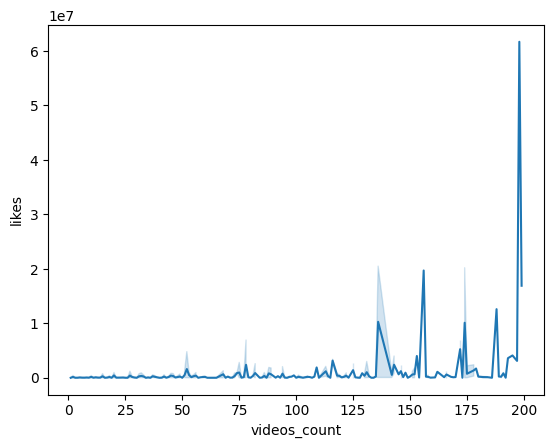

In [57]:
small_df = df.query("videos_count < 200") # Remove some extrem outliers
sns.lineplot(x=small_df["videos_count"], y=small_df["likes"])

<Axes: xlabel='likes_per_video', ylabel='followers'>

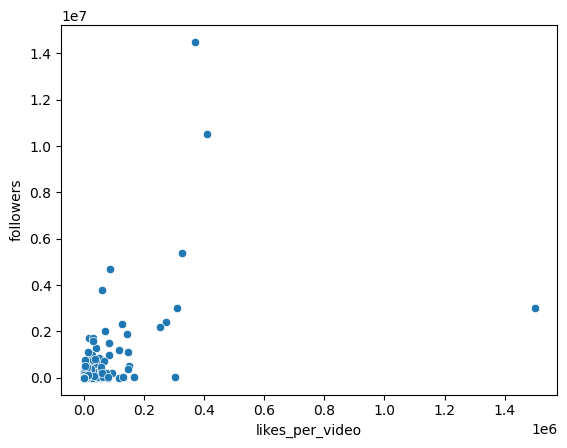

In [62]:
likes_per_video = df["likes"] / df["videos_count"]

plt.xlabel("likes_per_video")
sns.scatterplot(x=likes_per_video, y=df["followers"])

**Learning:** Since there is a positive correlation between the ratio "likes_per_video" and the number of followers, a good idea for **feature engineering** would be to add a column with that ratio.

Now, let's check out what the minimum amount of followers is for users with verified profiles: 

In [70]:
df.groupby(['is_verified']).followers.agg([len, min, max])

,len,min,max
is_verified,,,
False,981,1,14500000
True,19,16800,10500000


# Final decisions: 
* *biography:* **imputing the missing values** -> **feature engineering** (using **NLP** to check the probabilty of being a content creator)
* *likes and followers:* **feature engineering** (using **PCA** to add two columns that represent the axes with the most amount of variance)
* *bio_link:* **feature engineering** (adding a column that indicates if there is a link in the bio or not) 
* *likes and videos_count:* **feature engineering** (adding a column with the likes_per_video ratio)
* *remainder:* passthrough

In [9]:
features = ["biography", "comment_engagement_rate", "like_engagement_rate", "bio_link", "is_verified", "followers", "following", "likes", "videos_count"]

X = df[features].copy()
y = df["awg_engagement_rate"] > 0.05


# Feature Engineering Transformers:

In [6]:
keywords = ["vlogger", "influencer", "blogger", "creator", "model", "traveller"]
string_matcher = BiographyTransformer(keywords=keywords)

pca_transformer = PCATransformer()
missing_value_identifier = MissingValueIdentifier(feature_name="bio_link")
ratio_transformer = RatioTransformer(numerator="likes", denominator="videos_count")

# Data pipeline and column transformer

In [14]:
biography_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value="none")), 
    ("matcher", string_matcher)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('biography_col', biography_pipeline, ["biography"]), 
        ("likes_followers_col", pca_transformer, ["likes", "followers"]),
        ("bio_lnk_col", missing_value_identifier, ["bio_link"]),
        ("likes_per_video_col", ratio_transformer, ["likes", "videos_count"])
    ], remainder="passthrough")

# Data transformations

In [22]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y.to_numpy(), test_size=0.2, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(preprocessor.fit_transform(X_train))
X_valid_transformed = scaler.transform(preprocessor.transform(X_valid))
X_test_transformed = scaler.transform(preprocessor.transform(X_test))

# Pytorch model training

In [29]:
model = Net(n_layers=3, n_units=64, dropout_rate=0.2, input_shape=9, activation=nn.ReLU(), output_units=1, output_activation=nn.Sigmoid())

criterion = nn.BCELoss()
optimizer = Adam(model.parameters())


train_data = TensorDataset(torch.tensor(X_train_transformed), torch.tensor(y_train))
valid_data = TensorDataset(torch.tensor(X_valid_transformed), torch.tensor(y_valid))

train_loader = DataLoader(train_data, batch_size=512)
valid_loader = DataLoader(valid_data, batch_size=512)

best_loss = float('inf')
patience = 25
patience_counter = 0

for epoch in range(10000):
    for inputs, targets in train_loader:
        inputs = inputs.float()  # Convert inputs to float
        targets = targets.float()  # Convert targets to float
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:  # Check validation loss every 10 epochs
        with torch.no_grad():
            valid_loss = sum(criterion(model(inputs.float()).squeeze(), targets.float()) for inputs, targets in valid_loader)
        print(f'Epoch {epoch}, Validation loss: {valid_loss.item()}')

        # Early stopping logic
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_params = model.state_dict()  # Save the best parameters
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping due to no improvement in validation loss")
            model.load_state_dict(best_params)  # Load the best parameters
            break


Epoch 0, Validation loss: 0.693830668926239
Epoch 10, Validation loss: 0.6896699666976929
Epoch 20, Validation loss: 0.6758692860603333
Epoch 30, Validation loss: 0.6839296221733093
Epoch 40, Validation loss: 0.6860443353652954
Epoch 50, Validation loss: 0.6692346334457397
Epoch 60, Validation loss: 0.6653621196746826
Epoch 70, Validation loss: 0.654411256313324
Epoch 80, Validation loss: 0.657854437828064
Epoch 90, Validation loss: 0.651131272315979
Epoch 100, Validation loss: 0.6280073523521423
Epoch 110, Validation loss: 0.6392440795898438
Epoch 120, Validation loss: 0.6193937659263611
Epoch 130, Validation loss: 0.6112899780273438
Epoch 140, Validation loss: 0.5838645696640015
Epoch 150, Validation loss: 0.5691366195678711
Epoch 160, Validation loss: 0.5907393097877502
Epoch 170, Validation loss: 0.5739516615867615
Epoch 180, Validation loss: 0.5419763922691345
Epoch 190, Validation loss: 0.5604485273361206
Epoch 200, Validation loss: 0.5413629412651062
Epoch 210, Validation loss: 

Let's check the precision and recall of the default model:  

In [46]:
X_test_tensor = torch.tensor(X_test_transformed).float()  # Convert to tensor and ensure it's float
predictions = model(X_test_tensor) >= 0.5 

# Calculate scores
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f'F1 Score: {f1:.2f}')
print(f'Precision Score: {precision:.2f}')
print(f'Recall Score: {recall:.2f}')

F1 Score: 0.93
Precision Score: 0.97
Recall Score: 0.89


# Visualizing the precision and recall trade-off:

<Axes: xlabel='Thresholds'>

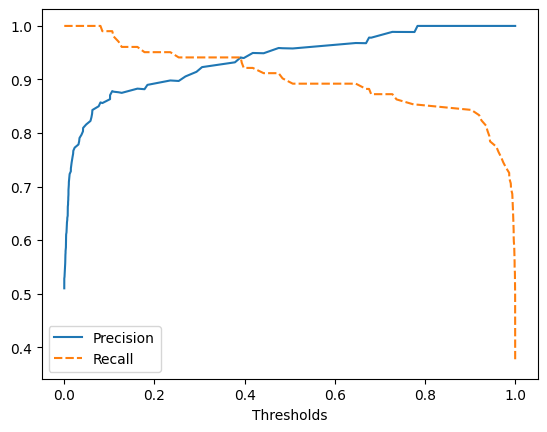

In [48]:
X_test_tensor = torch.tensor(X_test_transformed).float()
prediction_scores = model(X_test_tensor).detach().numpy()

precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_scores)

metrics = pd.DataFrame({
    "Precision": precisions[:-1], 
    "Recall": recalls[:-1],    
}, index=thresholds)

plt.xlabel("Thresholds")
sns.lineplot(metrics)

# Model Optimization: Trading a bit of precision for a higher recall

In [58]:
custom_precision_threshold = thresholds[np.argmax(precisions >= 0.88)]
recalibrated_predictions = model(X_test_tensor).detach().numpy() >= custom_precision_threshold

# Calculate scores
f1 = f1_score(y_test, recalibrated_predictions)
precision = precision_score(y_test, recalibrated_predictions)
recall = recall_score(y_test, recalibrated_predictions)

print(f'F1 Score: {f1:.2f}')
print(f'Precision Score: {precision:.2f}')
print(f'Recall Score: {recall:.2f}')

F1 Score: 0.93
Precision Score: 0.91
Recall Score: 0.96
